# LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

In [1]:
# My GitHub repository.

In [2]:
# https://github.com/TimAyling/DA201_Assignment/tree/main

# 

# Assignment activity 2

### Prepare your workstation

In [161]:
# Import the necessary libraries.sdx
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from seaborn import pairplot, heatmap
from datetime import date
import calendar
import matplotlib.pyplot as plt


# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')
print(ad.shape)
ad.dtypes
# View the DataFrame
#print(ad.shape)
#ad.dtypes

(137793, 8)


sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [5]:
# Viewing the head of the DataFrame Actual Duration
ad.head(5)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [6]:
# Viewing the tail of the DataFrame Actual Duration
ad.tail(5)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439
137792,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,1-5 Minutes,1739


In [7]:
# Determine whether there are missing values.
ad.isnull().values.any()




False

In [8]:
# Determine the metadata of the data set.



In [9]:
# Determine the descriptive statistics of the data set.
ad.describe()


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [5]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')



In [11]:
# Viewing the head of the DataFrame Appointments Regional
ar.head(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [12]:
# Viewing the tail of the DataFrame Appointments Regional
ar.tail(5)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17
596820,E54000050,2022-06,Unknown,Unknown,Unknown,Same Day,10


In [13]:
# View the DataFrame
print(ar.shape)
print(ar.dtypes)

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [14]:
# Determine whether there are missing values.
ar.isnull().values.any()


False

In [15]:
# Determine the metadata of the data set.


In [16]:
# Determine the descriptive statistics of the data set.
ar.describe()


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [8]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame
print(nc.shape)
nc.dtypes

(817394, 8)


appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [9]:
# Viewing the head of the DataFrame National Categories
nc.head(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [19]:
# Viewing the tail of the DataFrame National Categories
nc.tail(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06
817393,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Acute,19,2022-06


In [10]:
# Determine whether there are missing values.
nc.isnull().values.any()

False

In [21]:
# Determine the metadata of the data set.


In [11]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [12]:
# Determine the number of locations.
# Number of locations  -i.e. sub_icb_location_name
# Create a group and then determine its size
#loc_name1 = nc.groupby('sub_icb_location_name')
#loc_name1.size()
loc_name1 = nc.groupby('sub_icb_location_name')
print(len(loc_name1), 'locations')


106 locations


**Question 2:** What are the five locations with the highest number of records?



In [13]:
nc.columns

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')

In [25]:
# Determine the top five locations based on record count.'sub_icb_location_name'
#nc.groupby(by='count_of_appointments')['sub_icb_location_name']nlargest(5)
# extracting greatest 5
#loc_name1.groupby(by='count_of_appointments')['sub_icb_location_name'].value_counts()
  
nc_new = loc_name1.appointment_date.count().sort_values(ascending=False)
nc_new.head()


sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: appointment_date, dtype: int64

In [21]:
# max = Returns max of a column
nc.count_of_appointments.max()


16590


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [27]:
# Determine the number of service settings.
#  -i.e. service_setting
# Create a group and then determine its size
service_set = nc.groupby('service_setting')
print(len(service_set),'service set')

5 service set


In [28]:
# Determine the number of context types.
# -i.e. context_type
# Create a group and then determine its size
con_type = nc.groupby('context_type')
print(len(con_type),'context type')
      

3 context type


In [19]:
# Determine the number of national categories.
# -i.e. national_category
# Create a group and then determine its size
nat_category = nc.groupby('national_category')
print(len(nat_category),'national category')

18 national category


In [17]:
# Determine the number of appointment status.
# -i.e. appointment_status
# Create a group and then determine its size
ar_app_stat = ar.groupby('appointment_status')
print(len(ar_app_stat),'appointment status')


3 appointment status


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [31]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
# Import Datetime
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head(5)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [23]:
# Change the date format of ad['appointment_date'].

# currently in format: DD-MM(text)-YY (01-Dec-21)
# change to: DD-MM-YY - "%d %m %Y"
# Import the datetime module and datetime class.
# View the DateFrame.
ad['appointment_date'] = pd.to_datetime(ad.appointment_date)
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%d-%m-%y')
ad.head()


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-12-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-12-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-12-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-12-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-12-21,16-20 Minutes,730


In [34]:
# Change the date format of nc['appointment_date'].
# currently in format: YYYY-MM-DD (2021-08-02)
# change to: DD-MM-YY
# View the DateFrame.
nc['appointment_date'] = pd.to_datetime(nc.appointment_date)
nc['appointment_date'] = nc['appointment_date'].dt.strftime('%d-%m-%y')
nc.head()



,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,02-08-21,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,02-08-21,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,02-08-21,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,02-08-21,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,02-08-21,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [35]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
#come back to this

nc_date = nc.appointment_date.max()
print(nc_date)




31-12-21


In [24]:
# min = Returns min of a column
nc_date1 = nc.appointment_date.min()
print(nc_date1)

2021-08-01 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [25]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_location = loc_name1.get_group('NHS North West London ICB - W2U3Z')
k = nc_location[(nc_location['appointment_date'] >= '01-01-22') & (nc_location['appointment_date']  <= '01-06-22')]
service_setting=k.groupby("service_setting")
max_service_setting = service_setting.appointment_date.count().sort_values(ascending=False).head(1)
print(max_service_setting)
# View the output.


service_setting
General Practice    72
Name: appointment_date, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [26]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

nc_app_month= nc.groupby('appointment_month')
v = nc_app_month['count_of_appointments'].sum().sort_values(ascending=False).head(1)
print(v)

appointment_month
2021-11    30405070
Name: count_of_appointments, dtype: int64


**Question 4:** What was the total number of records per month?

In [27]:
# Total number of records per month.
Total_number_month = nc_app_month.appointment_date.count()
print(Total_number_month)

appointment_month
2021-08    69999
2021-09    74922
2021-10    74078
2021-11    77652
2021-12    72651
2022-01    71896
2022-02    71769
2022-03    82822
2022-04    70012
2022-05    77425
2022-06    74168
Name: appointment_date, dtype: int64


# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [54]:
# Import the necessary libraries.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [30]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc_ss1 = nc_ss.loc[ : , 'appointment_month'].convert_dtypes()

NameError: name 'nc_ss' is not defined

In [ ]:
# Aggregate on monthly level and determine the sum of records per month.


# View output.


**Service settings:**

In [33]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
nc_ss = nc.groupby(['appointment_month', 'service_setting']).sum().reset_index()
nc_ss.head(5)

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Context types:**

In [35]:
# Execute the below code for columns 'context types'
nc_ss = nc.groupby(['appointment_month', 'context_type']).sum().reset_index()
nc_ss.head(5)

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.


**National categories:**

In [37]:
# Execute the below code for columns 'national category'
nc_ss = nc.groupby(['appointment_month', 'national_category']).sum().reset_index()
nc_ss.head(5)

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [39]:
# Create a separate data set that can be used in future weeks. 
# create a dataset to be used for analysis of the seasons
nc_ss = nc.groupby(['appointment_month', 'appointment_date', 'service_setting']).sum().reset_index()
print(nc_ss)
# View output.


     appointment_month appointment_date            service_setting  \
0              2021-08       2021-08-01  Extended Access Provision   
1              2021-08       2021-08-01           General Practice   
2              2021-08       2021-08-01                      Other   
3              2021-08       2021-08-01       Primary Care Network   
4              2021-08       2021-08-01                   Unmapped   
...                ...              ...                        ...   
1665           2022-06       2022-06-30  Extended Access Provision   
1666           2022-06       2022-06-30           General Practice   
1667           2022-06       2022-06-30                      Other   
1668           2022-06       2022-06-30       Primary Care Network   
1669           2022-06       2022-06-30                   Unmapped   

      count_of_appointments  
0                       438  
1                      3411  
2                       401  
3                       323  
4        

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

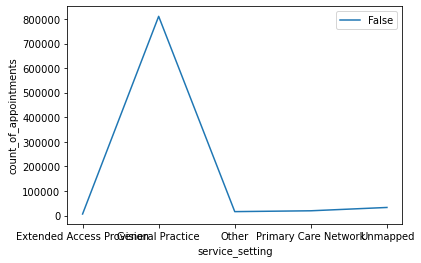

In [40]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='service_setting', y='count_of_appointments', hue='appointment_month'=='2021-08', data=nc_ss, ci=None)

**Autumn (October 2021):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

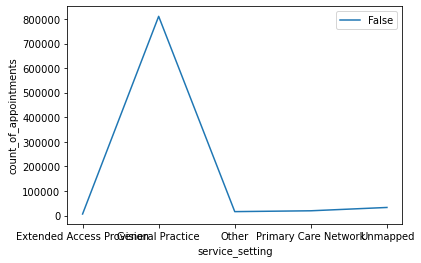

In [41]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='service_setting', y='count_of_appointments', hue='appointment_month'=='2021-10', data=nc_ss, ci=None)


**Winter (January 2022):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

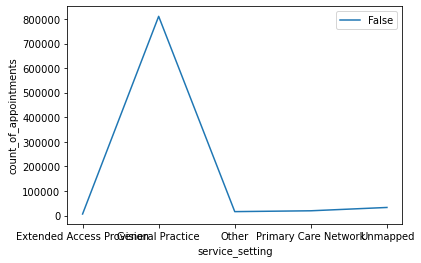

In [42]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='service_setting', y='count_of_appointments', hue='appointment_month'=='2022-01', data=nc_ss, ci=None)

**Spring (April 2022):**

<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

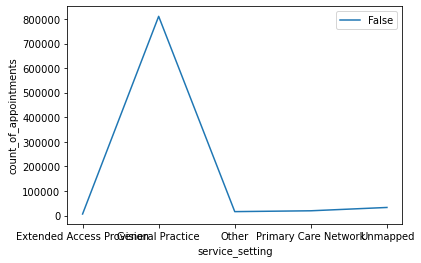

In [43]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
sns.lineplot(x='service_setting', y='count_of_appointments', hue='appointment_month'=='2022-04', data=nc_ss, ci=None)


<AxesSubplot:xlabel='service_setting', ylabel='count_of_appointments'>

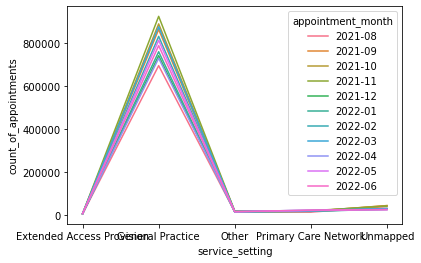

In [44]:
#Create a lineplot for all seasons:
sns.lineplot(x='service_setting', y='count_of_appointments', hue='appointment_month', data=nc_ss, ci=None)

# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [45]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns
import requests 
from bs4 import BeautifulSoup

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [46]:
# Load the data set
tweet = pd.read_csv('tweets.csv')
tweet.head()
# View the DataFrame.


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [50]:
# Explore the information:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [47]:
# Explore the metadata.
tweet.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [ ]:
tweet.columns

In [49]:
# Explore the data set.
print(tweet.shape)
print(tweet.dtypes)

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


In [53]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.
tweet['tweet_favorite_count'].value_counts()



0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64

In [ ]:
# Answer explained
The table above illustrates nothing as it is just a table of numbers but as is not associated with any other information such which are the tweets in question, this table and its onctents can be discarded.

In [54]:
# retweeted messages
tweet['tweet_retweet_count'].value_counts()


0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64

In [ ]:
# Retweet answer: 
As is evident from above the table gives no imformation about which tweets are associated with the numbers and hence no inference can be drawn form it as they are just a series of meaningless numbers.

In [56]:
# Create a new DataFrame containing only the text.
tweet_text = tweet['tweet_full_text']

# View the DataFrame.
tweet_text.head()

0    As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4    ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take 

In [133]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweet['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
           
            

In [61]:
print(tags)

['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '🚨#new:🚨', '#disparities.', '@karahartnett\n#healthcare', '#alert', '#insurance', '#data\nhttps://t.co/h9hlamr7p9', '#healthcare', '#healthcare', '❤️\n\n#healthcare', '#healthcare', '#hcldr', '#premisehealth', '#hiring', '#premisehealth', '#hiring', '#healthcare', '#qualitypatientcare', '#jobs', '#job', '#ascp2022', '#ascp100.', '#healthcare', '#healthsecretary', '#healthcare', '#ai,', '#sdoh,', '#healthcare', '\nhttps://t.co/ewe7jntj1e\n#tropicana', '#real', '#juice', '#healthcare', '#watch', '#worms', '#fruits', '#healthtips', '#tips', '#healthcare', '#thewoodlands,', '#healthcare', '#chicago

In [134]:
# Display the first 30 records.?????????????
# Arrange in Series (first step)
tags = pd.Series(tags)
print(tags)


0              #healthcare
1           #premisehealth
2                  #hiring
3              #healthcare
4                  🚨#new:🚨
               ...        
4328    #mediqueststaffing
4329             #hospital
4330                #shift
4331       (#newportbeach)
4332                  #job
Length: 4333, dtype: object


In [135]:
# Display the first 30 records.
tags = tags.value_counts().head(30)
tags


#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [136]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags).reset_index()
data.head(3)



,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41


In [137]:
# Rename the columns.
data.columns = ['Word', 'Count']
data.head()

,Word,Count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [138]:
# Fix the count datatype.
data.info()


# View the result.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    30 non-null     object
 1   Count   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [139]:
# Fix the count datatype.
data.describe()

,Count
count,30.000000
mean,47.166667
std,127.015362
min,14.000000
25%,16.000000
50%,20.500000
75%,27.250000
max,716.000000


In [140]:
data['Count'] = data['Count'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    30 non-null     object
 1   Count   30 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 488.0+ bytes


In [141]:
# Display records where the count is larger than 10.
data_count = data[data['Count'] > 10]
data_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    30 non-null     object
 1   Count   30 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 600.0+ bytes


<AxesSubplot:xlabel='Count', ylabel='Word'>

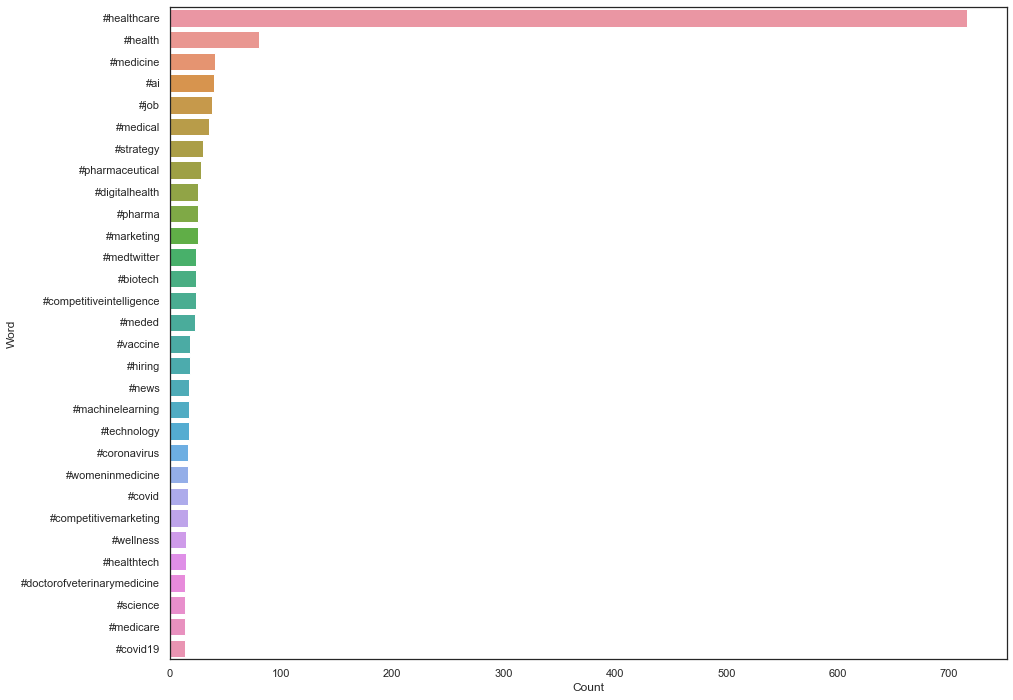

In [142]:
# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(x='Count', y='Word', estimator=sum, data=data_count)

In [143]:
# The columns you want to search for outliers in.
cols = ['Count'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = data[cols].quantile(0.25) 
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a Boolean array of the rows with (any) non-outlier column values.
condition = ~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our DataFrame based on condition.
data_non_outlier = data[condition]
data_non_outlier.shape




(28, 2)

<AxesSubplot:xlabel='Count', ylabel='Word'>

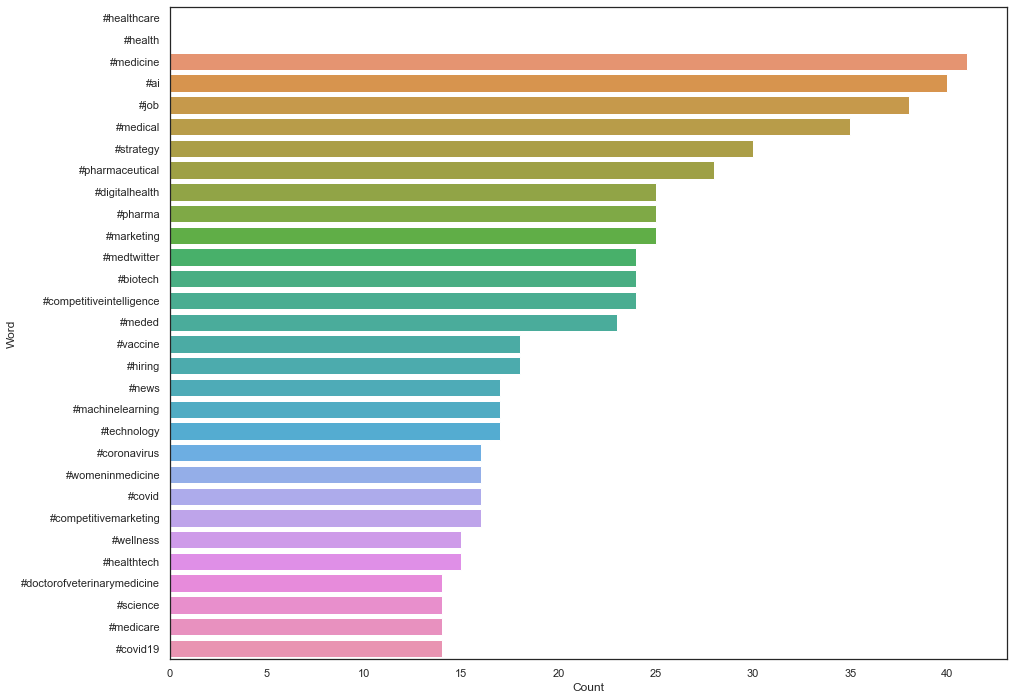

In [144]:
# View the barplot.
sns.barplot(y='Word', x=data_non_outlier['Count'], data=data)

# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [98]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [99]:
ar.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

In [100]:
# Print the min and max dates.
ar_new = ar.appointment_month.max()
print(ar_new)


2022-06


In [101]:
ar_new = ar.appointment_month.min()
print(ar_new)

2020-01


In [111]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_new = ar[ar['appointment_month'] > '2021-08']
ar_new.head(5)


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3850,E54000034,2021-09,Attended,GP,Face-to-Face,1 Day,8288
3851,E54000034,2021-09,Attended,GP,Face-to-Face,15 to 21 Days,3827
3852,E54000034,2021-09,Attended,GP,Face-to-Face,2 to 7 Days,13466
3853,E54000034,2021-09,Attended,GP,Face-to-Face,22 to 28 Days,1300
3854,E54000034,2021-09,Attended,GP,Face-to-Face,8 to 14 Days,6825


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [145]:
# Create an aggregated data set to review the different features.
ar_agg = ar_new.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', \
                     'time_between_book_and_appointment']).sum().reset_index()

# View the DataFrame.
ar_agg.head()


,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-09,GP,Attended,Face-to-Face,1 Day,672515
1,2021-09,GP,Attended,Face-to-Face,15 to 21 Days,277425
2,2021-09,GP,Attended,Face-to-Face,2 to 7 Days,1222198
3,2021-09,GP,Attended,Face-to-Face,22 to 28 Days,158988
4,2021-09,GP,Attended,Face-to-Face,8 to 14 Days,538724


In [146]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby(['appointment_month', 'count_of_appointments']).sum().reset_index()
ar_df.head()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


,appointment_month,count_of_appointments,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment
0,2021-09,1,UnknownUnknownUnknownUnknownUnknown,AttendedAttendedDNADNAUnknown,Video/OnlineVideo/OnlineHome VisitUnknownVideo/Online,8 to 14 DaysUnknown / Data QualityUnknown / Data QualityUnknown / Data Quality8 to 14 Days
1,2021-09,2,Other Practice staffUnknownUnknownUnknown,UnknownUnknownUnknownUnknown,UnknownVideo/OnlineVideo/OnlineVideo/Online,Unknown / Data Quality1 Day2 to 7 DaysSame Day
2,2021-09,4,GP,Unknown,Video/Online,Unknown / Data Quality
3,2021-09,5,GP,Unknown,Unknown,Unknown / Data Quality
4,2021-09,6,UnknownUnknown,AttendedDNA,TelephoneVideo/Online,Unknown / Data QualitySame Day


In [147]:
# agg Information
ar_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   appointment_month                  3414 non-null   object
 1   hcp_type                           3414 non-null   object
 2   appointment_status                 3414 non-null   object
 3   appointment_mode                   3414 non-null   object
 4   time_between_book_and_appointment  3414 non-null   object
 5   count_of_appointments              3414 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 160.2+ KB


In [148]:
#df Information
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   appointment_month                  3178 non-null   object
 1   count_of_appointments              3178 non-null   int64 
 2   hcp_type                           3178 non-null   object
 3   appointment_status                 3178 non-null   object
 4   appointment_mode                   3178 non-null   object
 5   time_between_book_and_appointment  3178 non-null   object
dtypes: int64(1), object(5)
memory usage: 149.1+ KB


In [149]:
#df Columns
ar_df.columns

Index(['appointment_month', 'count_of_appointments', 'hcp_type',
       'appointment_status', 'appointment_mode',
       'time_between_book_and_appointment'],
      dtype='object')

In [150]:
ar_agg['appointment_month'] = ar_agg['appointment_month'].convert_dtypes()
ar_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   appointment_month                  3414 non-null   string
 1   hcp_type                           3414 non-null   object
 2   appointment_status                 3414 non-null   object
 3   appointment_mode                   3414 non-null   object
 4   time_between_book_and_appointment  3414 non-null   object
 5   count_of_appointments              3414 non-null   int64 
dtypes: int64(1), object(4), string(1)
memory usage: 160.2+ KB


In [151]:
ar_df['appointment_month'] = ar_df['appointment_month'].convert_dtypes()
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   appointment_month                  3178 non-null   string
 1   count_of_appointments              3178 non-null   int64 
 2   hcp_type                           3178 non-null   object
 3   appointment_status                 3178 non-null   object
 4   appointment_mode                   3178 non-null   object
 5   time_between_book_and_appointment  3178 non-null   object
dtypes: int64(1), object(4), string(1)
memory usage: 149.1+ KB


In [152]:
# Adding the utilisation column 
ar_df['utilisation'] = ar_df['appointment_month'].count() / 30
ar_df.head()


,appointment_month,count_of_appointments,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,utilisation
0,2021-09,1,UnknownUnknownUnknownUnknownUnknown,AttendedAttendedDNADNAUnknown,Video/OnlineVideo/OnlineHome VisitUnknownVideo/Online,8 to 14 DaysUnknown / Data QualityUnknown / Data QualityUnknown / Data Quality8 to 14 Days,105.933333
1,2021-09,2,Other Practice staffUnknownUnknownUnknown,UnknownUnknownUnknownUnknown,UnknownVideo/OnlineVideo/OnlineVideo/Online,Unknown / Data Quality1 Day2 to 7 DaysSame Day,105.933333
2,2021-09,4,GP,Unknown,Video/Online,Unknown / Data Quality,105.933333
3,2021-09,5,GP,Unknown,Unknown,Unknown / Data Quality,105.933333
4,2021-09,6,UnknownUnknown,AttendedDNA,TelephoneVideo/Online,Unknown / Data QualitySame Day,105.933333


[Text(0.5, 0, 'Appointment Month'),
 Text(0, 0.5, 'Number of Appointments'),
 Text(0.5, 1.0, 'Number of Monthly Visits')]

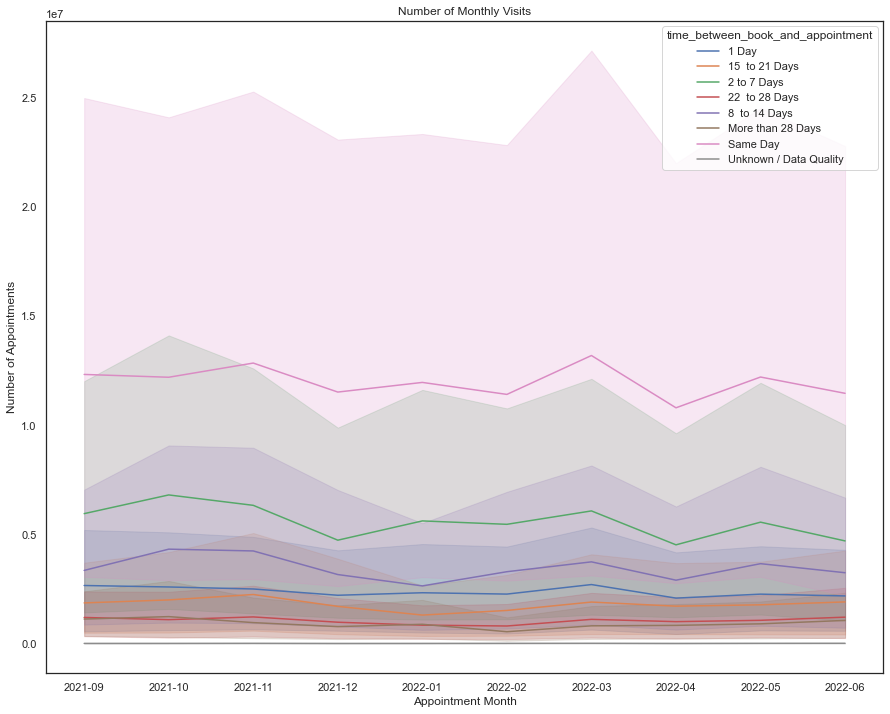

In [153]:
# Plot monthly capacity utilisation.


# Create a lineplot.
ar_plot = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', estimator=sum, data=ar_agg)
ar_plot.set(xlabel='Appointment Month', ylabel='Number of Appointments', title='Number of Monthly Visits')

[Text(0.5, 0, 'Appointment Month'),
 Text(0, 0.5, 'Utilisation of Resources'),
 Text(0.5, 1.0, 'Monthly Capacity Utilisation')]

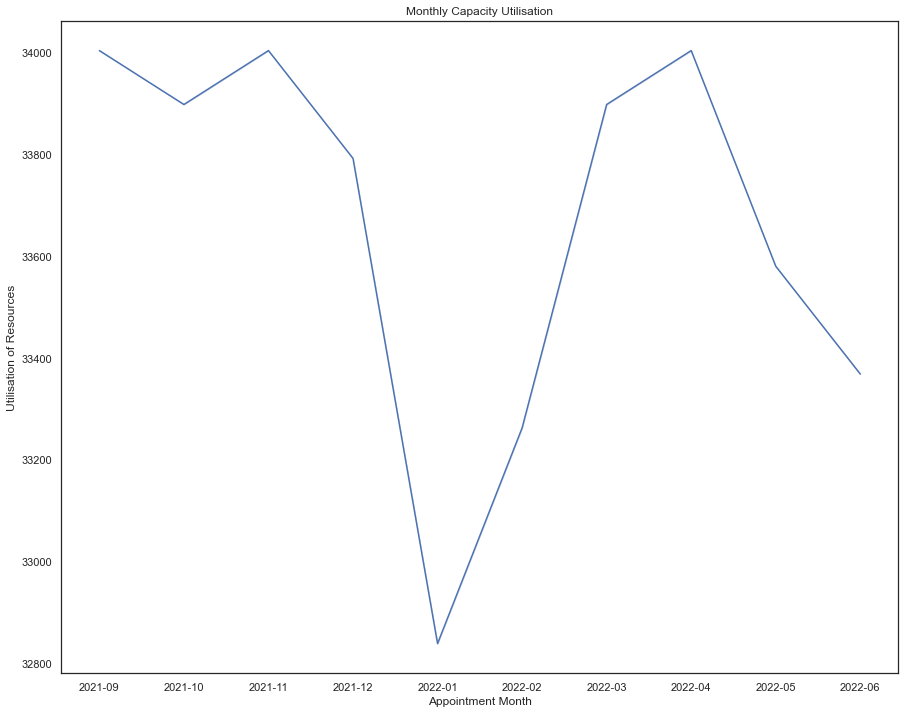

In [154]:
#Utilisation of resources per month
ar_plot1 = sns.lineplot(x='appointment_month', y='utilisation', estimator=sum, data=ar_df)
ar_plot1.set(xlabel='Appointment Month', ylabel='Utilisation of Resources', title='Monthly Capacity Utilisation')

**Question 2:** How do the healthcare professional types differ over time?

In [155]:
ar_hc = ar_agg.groupby(['appointment_month', 'hcp_type']).sum().reset_index()
ar_hc.head()

,appointment_month,hcp_type,count_of_appointments
0,2021-09,GP,14487785
1,2021-09,Other Practice staff,13126731
2,2021-09,Unknown,907985
3,2021-10,GP,14300751
4,2021-10,Other Practice staff,14942504


In [156]:
ar_hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      30 non-null     string
 1   hcp_type               30 non-null     object
 2   count_of_appointments  30 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 848.0+ bytes


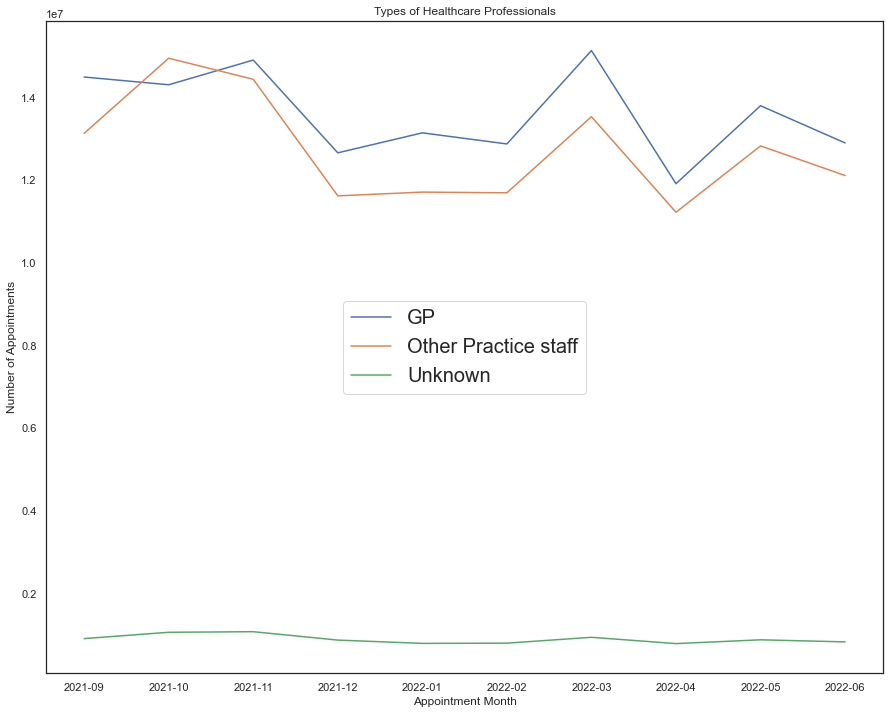

In [162]:
# Create a line plot to answer the question.
ar_plot2 = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', estimator=sum, data=ar_hc)
ar_plot2.set(xlabel='Appointment Month', ylabel='Number of Appointments', title='Types of Healthcare Professionals')
fontsize=20
plt.legend(loc='center', frameon=True, fontsize=fontsize)

**Question 3:** Are there significant changes in whether or not visits are attended?

In [158]:
# Create a line plot to answer the question.
# Types of attendance

ar_hc1 = ar_agg.groupby(['appointment_month', 'appointment_status']).sum().reset_index()
ar_hc1.head()

,appointment_month,appointment_status,count_of_appointments
0,2021-09,Attended,25757066
1,2021-09,DNA,1321348
2,2021-09,Unknown,1444087
3,2021-10,Attended,27170506
4,2021-10,DNA,1565624


In [159]:
# Create a line plot to answer the question.
# Info
ar_hc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      30 non-null     string
 1   appointment_status     30 non-null     object
 2   count_of_appointments  30 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 848.0+ bytes


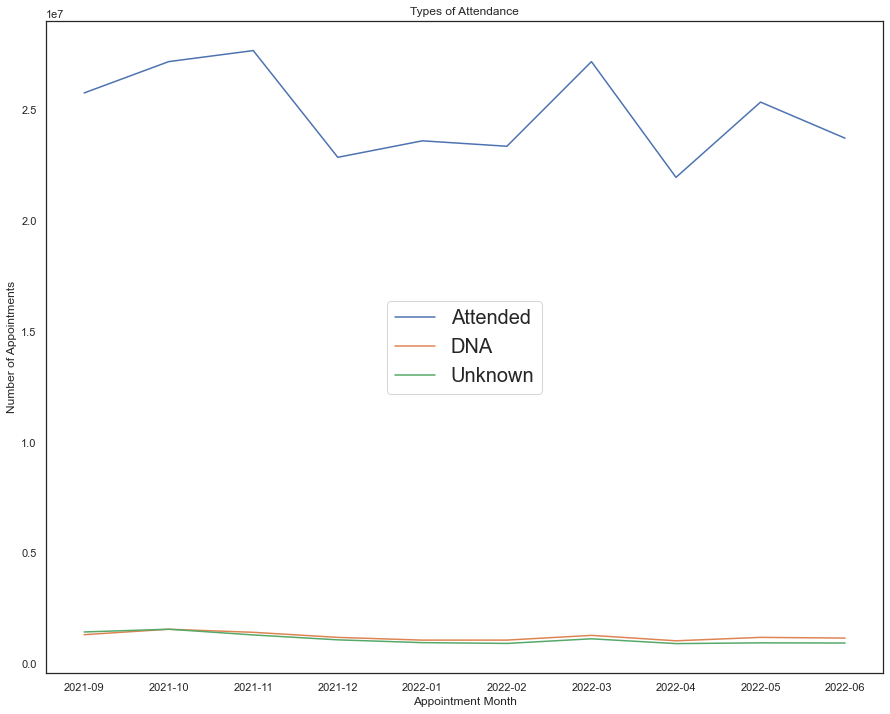

In [163]:
ar_plot3 = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', estimator=sum, data=ar_hc1)
ar_plot3.set(xlabel='Appointment Month', ylabel='Number of Appointments', title='Types of Attendance')
fontsize=20
plt.legend(loc='center', frameon=True, fontsize=fontsize)

**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [164]:
ar_hc2 = ar_agg.groupby(['appointment_month', 'appointment_mode']).sum().reset_index()
ar_hc2.head()

,appointment_month,appointment_mode,count_of_appointments
0,2021-09,Face-to-Face,17266602
1,2021-09,Home Visit,171829
2,2021-09,Telephone,10068770
3,2021-09,Unknown,859946
4,2021-09,Video/Online,155354


In [165]:
ar_hc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      50 non-null     string
 1   appointment_mode       50 non-null     object
 2   count_of_appointments  50 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 1.3+ KB


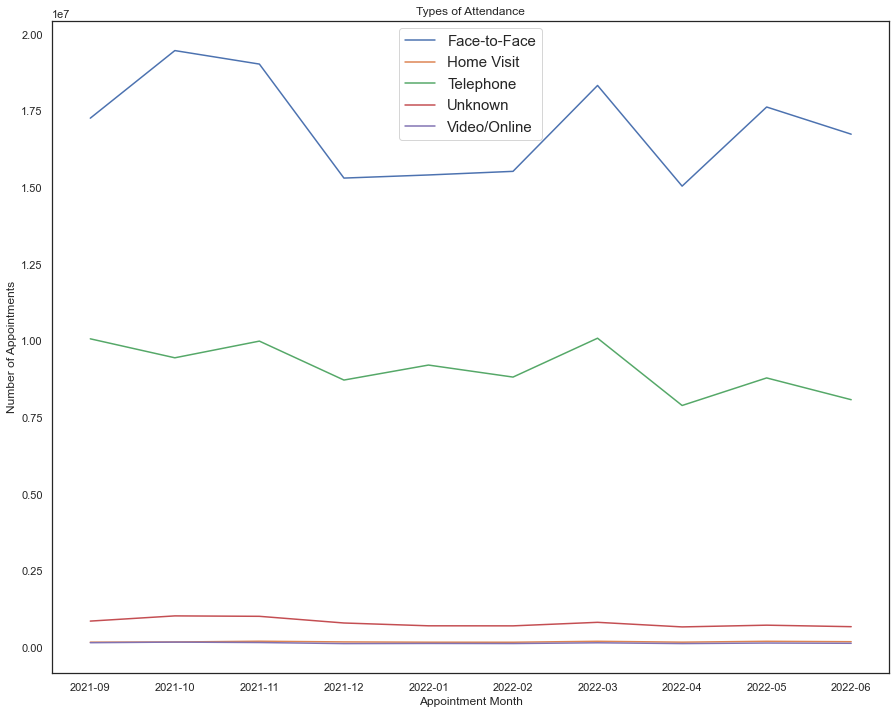

In [166]:
# Create a line plot to answer the question.
ar_plot4 = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', estimator=sum, data=ar_hc2)
ar_plot4.set(xlabel='Appointment Month', ylabel='Number of Appointments', title='Types of Attendance')
fontsize=15
plt.legend(loc='best', frameon=True, fontsize=fontsize)

**Question 5:** Are there any trends in time between booking an appointment?

In [167]:
ar_hc3 = ar_agg.groupby(['appointment_month', 'time_between_book_and_appointment']).sum().reset_index()
ar_hc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   appointment_month                  80 non-null     string
 1   time_between_book_and_appointment  80 non-null     object
 2   count_of_appointments              80 non-null     int64 
dtypes: int64(1), object(1), string(1)
memory usage: 2.0+ KB


In [168]:
ar_hc3.head(3)

,appointment_month,time_between_book_and_appointment,count_of_appointments
0,2021-09,1 Day,2666072
1,2021-09,15 to 21 Days,1869263
2,2021-09,2 to 7 Days,5955074


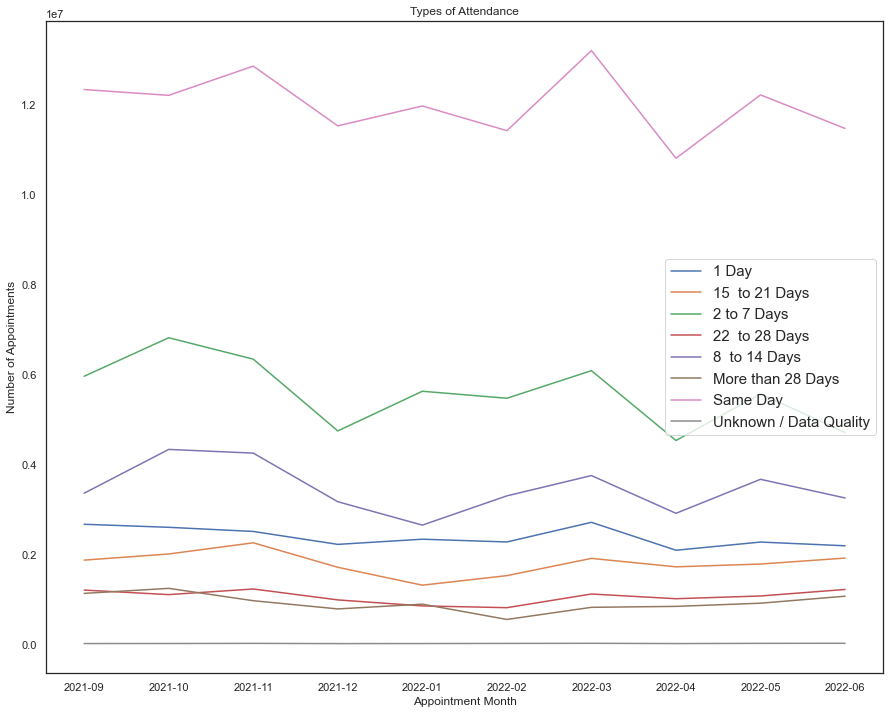

In [169]:
# Create a line plot to answer the question.
ar_plot5 = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', estimator=sum, data=ar_hc3)
ar_plot5.set(xlabel='Appointment Month', ylabel='Number of Appointments', title='Types of Attendance')
fontsize=15
plt.legend(loc='best', frameon=True, fontsize=fontsize)

**Question 6:** How do the spread of service settings compare?

In [171]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc_apt = nc.groupby(['service_setting', 'count_of_appointments']).sum().reset_index()
nc_apt.head(1)

,service_setting,count_of_appointments,icb_ons_code,sub_icb_location_name,context_type,national_category,appointment_month
0,Extended Access Provision,1,E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E540000...,NHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cum...,Inconsistent MappingInconsistent MappingCare Related EncounterInconsistent MappingCare Related EncounterInconsistent MappingInconsistent MappingCare Related EncounterInconsistent MappingInconsiste...,Inconsistent MappingInconsistent MappingPlanned Clinical ProcedureInconsistent MappingPlanned ClinicsInconsistent MappingInconsistent MappingPlanned Clinical ProcedureInconsistent MappingInconsist...,2021-082021-082021-082021-092021-092021-092021-102021-102021-102021-102021-102021-102021-112021-112021-112021-112021-112021-112021-122021-122021-122021-122021-122021-122021-122021-122022-012022-01...


In [172]:
nc_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14019 entries, 0 to 14018
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   service_setting        14019 non-null  object
 1   count_of_appointments  14019 non-null  int64 
 2   icb_ons_code           14019 non-null  object
 3   sub_icb_location_name  14019 non-null  object
 4   context_type           14019 non-null  object
 5   national_category      14019 non-null  object
 6   appointment_month      14019 non-null  object
dtypes: int64(1), object(6)
memory usage: 766.8+ KB


In [173]:
nc_apt['service_setting'] = nc_apt['service_setting'].convert_dtypes()
nc_apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14019 entries, 0 to 14018
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   service_setting        14019 non-null  string
 1   count_of_appointments  14019 non-null  int64 
 2   icb_ons_code           14019 non-null  object
 3   sub_icb_location_name  14019 non-null  object
 4   context_type           14019 non-null  object
 5   national_category      14019 non-null  object
 6   appointment_month      14019 non-null  object
dtypes: int64(1), object(5), string(1)
memory usage: 766.8+ KB


[Text(0.5, 0, 'Types OF Services'),
 Text(0, 0.5, 'Number Of Appointments'),
 Text(0.5, 1.0, 'The Number of Appointments per Service Type')]

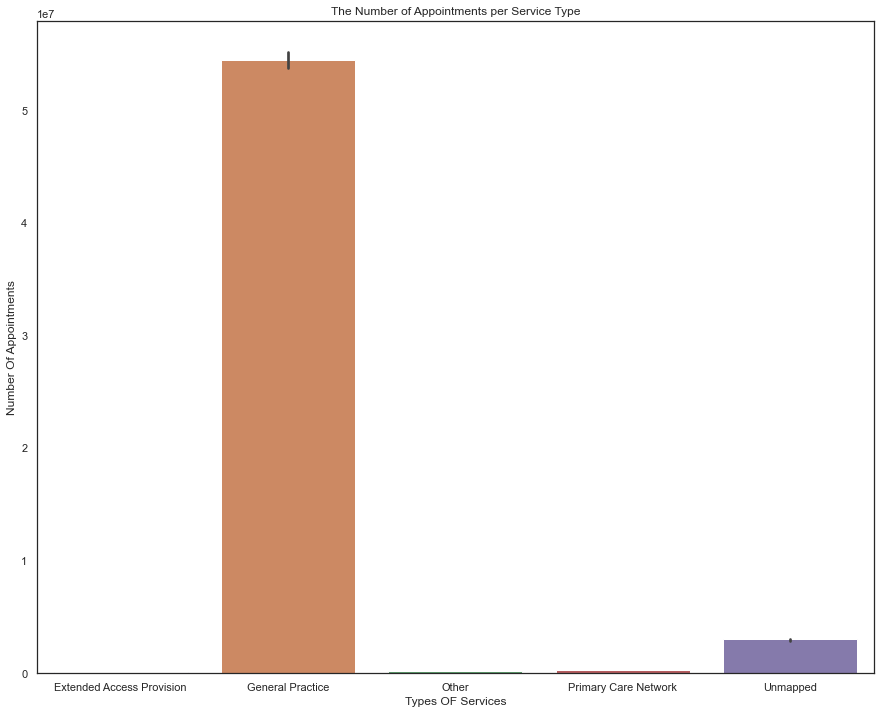

In [174]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.
nc_plot = sns.barplot(x='service_setting', y='count_of_appointments', estimator=sum, data=nc_apt)
nc_plot.set(xlabel='Types OF Services', ylabel='Number Of Appointments', title='The Number of Appointments per Service Type')

In [175]:
# Create a boxplot to investigate spread of service settings.
# Create a boxplot to investigate the service settings without GP.

nc_nogp = nc_apt[nc_apt['service_setting'] != 'General Practice']

In [177]:

nc_nogp.head()

,service_setting,count_of_appointments,icb_ons_code,sub_icb_location_name,context_type,national_category,appointment_month
0,Extended Access Provision,1,E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E540000...,NHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cum...,Inconsistent MappingInconsistent MappingCare Related EncounterInconsistent MappingCare Related EncounterInconsistent MappingInconsistent MappingCare Related EncounterInconsistent MappingInconsiste...,Inconsistent MappingInconsistent MappingPlanned Clinical ProcedureInconsistent MappingPlanned ClinicsInconsistent MappingInconsistent MappingPlanned Clinical ProcedureInconsistent MappingInconsist...,2021-082021-082021-082021-092021-092021-092021-102021-102021-102021-102021-102021-102021-112021-112021-112021-112021-112021-112021-122021-122021-122021-122021-122021-122021-122021-122022-012022-01...
1,Extended Access Provision,2,E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E540000...,NHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cum...,Care Related EncounterCare Related EncounterCare Related EncounterInconsistent MappingCare Related EncounterCare Related EncounterCare Related EncounterCare Related EncounterCare Related Encounter...,Planned Clinical ProcedurePlanned Clinical ProcedurePlanned ClinicsInconsistent MappingPlanned ClinicsPlanned ClinicsPlanned Clinical ProcedurePlanned Clinical ProcedurePlanned Clinical ProcedureP...,2021-082021-082021-082021-082021-092021-092021-092021-092021-092021-092021-092021-102021-102021-102021-102021-102021-102021-112021-112021-112021-112021-112021-112021-112021-112021-112021-122021-12...
2,Extended Access Provision,3,E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E540000...,NHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cum...,Care Related EncounterCare Related EncounterCare Related EncounterInconsistent MappingInconsistent MappingCare Related EncounterCare Related EncounterInconsistent MappingCare Related EncounterCare...,Planned ClinicsPlanned ClinicsPlanned ClinicsInconsistent MappingInconsistent MappingPlanned ClinicsPlanned ClinicsInconsistent MappingPlanned ClinicsPlanned ClinicsInconsistent MappingPlanned Cli...,2021-082021-082021-092021-092021-092021-102021-102021-102021-112021-122021-122021-122021-122022-012022-022022-032022-032022-032022-032022-032022-032022-032022-042022-042022-042022-052022-052022-05...
3,Extended Access Provision,4,E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E54000050E540000...,NHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cumbria ICB - 00LNHS North East and North Cum...,Care Related EncounterCare Related EncounterInconsistent MappingCare Related EncounterInconsistent MappingCare Related EncounterInconsistent MappingCare Related EncounterCare Related EncounterInco...,Planned ClinicsPlanned ClinicsInconsistent MappingPlanned ClinicsInconsistent MappingPlanned ClinicsInconsistent MappingPlanned ClinicsPlanned ClinicsInconsi

[Text(0.5, 0, 'Types OF Services'),
 Text(0, 0.5, 'Number Of Appointments'),
 Text(0.5, 1.0, 'The Number of Appointments per Service Type')]

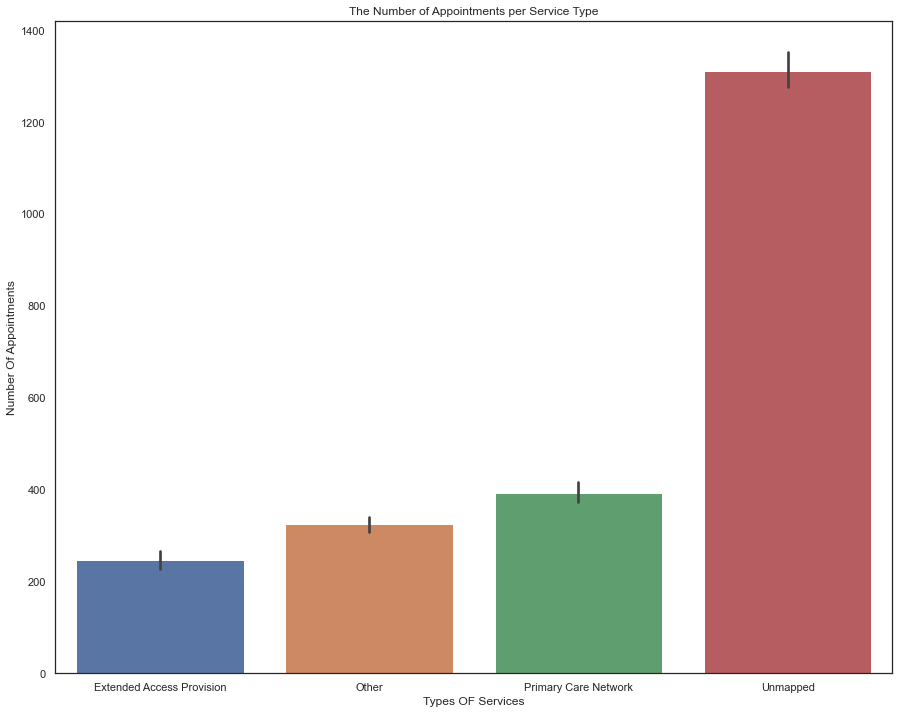

In [176]:
nc_nogp1 = sns.barplot(x='service_setting', y='count_of_appointments', data=nc_nogp)
nc_nogp1.set(xlabel='Types OF Services', ylabel='Number Of Appointments', title='The Number of Appointments per Service Type')

In [ ]:
# Summary Finding and Recommendations
Analysis of the data files provided shows the difference between the East and South-East of England and the rest of the country. The highest number of appointments recorded are in the East and South-East of the country from the information we collated. A large percentage of the appointments shows the patient booked but did not attend. This error together with others can be blamed on the medical practices having varying software systems which when amalgamated give errors like unknown, making it difficult for analysis and thus arrive at any concrete conclusions. 
As can be seen from the visualisations, the number of people attending GP surgeries are the highest and that is the main focus of primary healthcare in UK, and it has been noted that GP surgeries can offer more than just consultation and can act as a community healthcare point. The data sets provided also show that some trusts are overwhelmed with patients whilst others are underwhelmed. This comes into one of the questions where it speaks about the utilisation of resources. 
The management of services offered at the hospitals need to be looked at to share the load. Possibly to upgrade the facilities underutilised. Also if anything can be done to reduce the queues in A and E in services offered elsewhere or greater numbers of staff provided.
More medical staff is required for the NHS to improve health, less anxiety, wellbeing and less suffering.


